In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import matplotlib.pyplot as plt 
from collections import Counter

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
data=pd.read_csv('sign_mnist_train.csv')
data 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
print('Dataframe shape:',data.shape)

Dataframe shape: (27455, 785)


In [7]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
x=data.iloc[:, 1:].values
print('Number of images:', x.shape[0])
print('Number of pixel in each image:',x.shape[1])

Number of images: 27455
Number of pixel in each image: 784


In [9]:
y = data.iloc[:, :1].values.flatten()
print('Labels:\n', y)
print('Shape of Labels:', y.shape[0])

Labels:
 [ 3  6  2 ... 18 17 23]
Shape of Labels: 27455


In [10]:
def next_batch(batch_size,data,labels):
    idx=np.arange(0, len(data))
    np.random.shuffle(idx)
    idx=idx[:batch_size]
    data_shuffle=[data[i] for i in idx]
    labels_shuffle=[labels[i] for i in idx]
    return np.asarray(data_shuffle),np.asarray(labels_shuffle)


In [11]:
def display_images(data):
    x,y=data
    fig, axes =plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i].reshape(28,28), cmap= 'binary')
        ax.set_xlabel(chr(y[i]+65))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()    



 

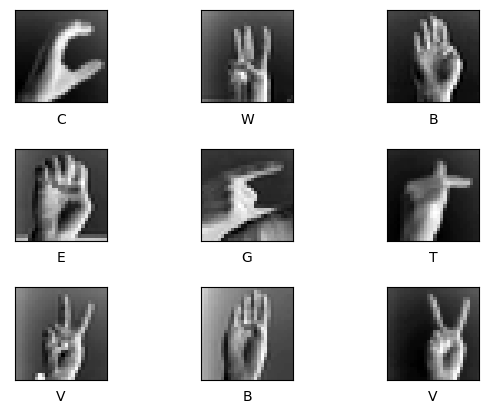

In [12]:
display_images(next_batch(9, x, y))

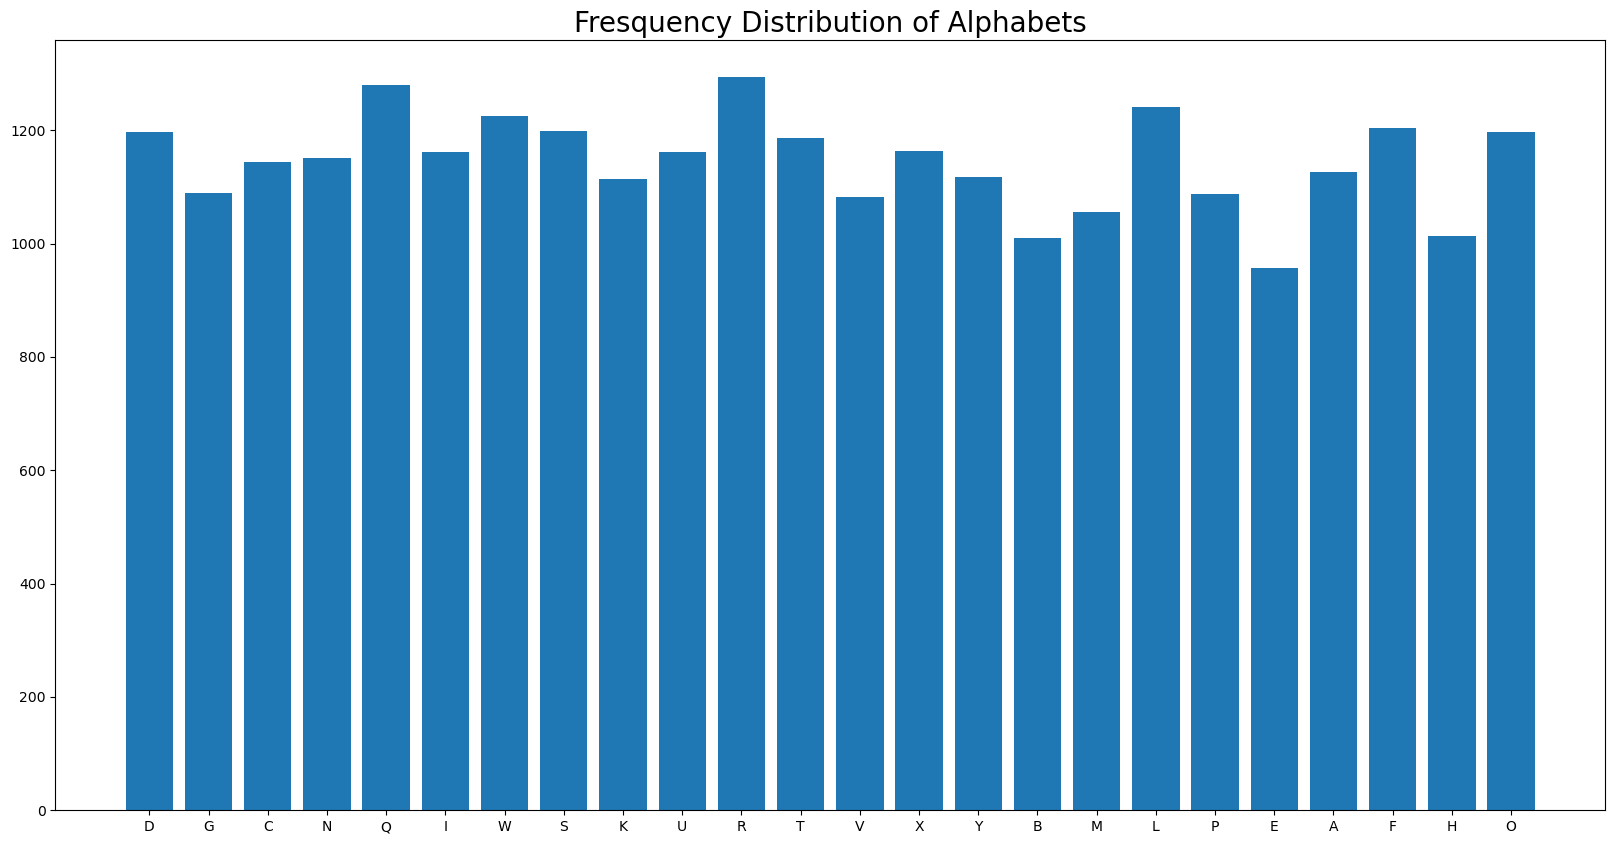

In [13]:
z= dict(Counter(list(y)))
labels=z.keys()
frequencies= [z[i] for i in labels]
labels=[chr(i+65) for i in z.keys()]


plt.figure(figsize=(20,10))
plt.bar(labels, frequencies)
plt.title('Fresquency Distribution of Alphabets', fontsize= 20)
plt.show()
          


one hot encodding 

In [14]:
def one_hot_encode(y):
    return np.eye(25)[y]
y_encoded= one_hot_encode(y)
print("shape of y after encoding :", y_encoded.shape)

shape of y after encoding : (27455, 25)


Building a Convolution Neural Network

In [15]:
#Training Parameters 
learning_rate= 0.001 
epochs=2000
batch_size= 128
display_step= 100

In [16]:
# Neural Network Hyperparameters 
n_input= 784 
n_classes = 25
dropout = 0.75 

In [17]:
# Placeholders 

X = tf.placeholder(tf.float32, shape =[None, n_input])
#placeholder for Feature Matrix 
Y = tf.placeholder(tf.float32, shape =[None, n_classes])
#Placeholder for Labels 

keep_prob= tf.placeholder(tf.float32)
#placeholder for Droup Rate 


In [18]:
weights={
    'w1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'w2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'w3': tf.Variable(tf.random_normal([7 * 7 * 64, 1024])),
    'w4': tf.Variable(tf.random_normal([1024, n_classes]))


}

In [19]:
biases={
    #Bias for convolutional layer 1
    'b1': tf.Variable(tf.random_normal([32])),
    'b2': tf.Variable(tf.random_normal([64])),
    'b3': tf.Variable(tf.random_normal([1024])),
    'b4': tf.Variable(tf.random_normal([n_classes])),
    
}


In [20]:
#Wrapper function for creating a Convolutional Layer 
def conv2d(x,W,b ,strides=1):
    x=tf.nn.conv2d(x,W, strides=[1, strides, strides,1],padding='SAME')
    x=tf.nn.bias_add(x,b)
    return tf.nn.relu(x)


In [21]:
# Wrapper function for creating a pooling layer 
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1,k,k,1], strides =[1,k,k,1], padding ='SAME')
              

In [22]:
import keras

In [23]:
def neural_network(x,weight,bias,dropout):
    x=tf.reshape(x,shape=[-1, 28, 28, 1])
    conv1= conv2d(x, weight['w1'],bias['b1']) #convolutonal Layer 1
    conv1=maxpool2d(conv1)#Pooling layer
    conv2=conv2d(conv1, weight['w2'],bias['b2']) ##convolutonal Layer 2
    conv2= maxpool2d(conv2)# pooling layer 2

    #Fully connected layer 
    fc=tf.reshape(conv2,[-1, weights['w3'].get_shape().as_list()[0]])
    fc=tf.add(tf.matmul(fc, weight['w3']), bias['b3']) #Linear Function
    fc=tf.nn.relu(fc) #Activation Function 
    fc=tf.nn.dropout(fc, dropout) #Applying dropout on Fully Connected Layer 
   # fc= keras.layers.Flatten()(fc)
    out= tf.add(tf.matmul(fc, weight['w4']), bias ['b4']) #Output Layer
    return out 




In [24]:
logits= neural_network(X, weights, biases, keep_prob )

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
loss_op = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)

In [26]:
correct_pred=tf.equal(tf.argmax(logits,1), tf.argmax(Y,1))
accuracy= tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [27]:
init=tf.global_variables_initializer()

Training the Neural Network

In [28]:
#splitting the dataset into Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test=train_test_split(x, y_encoded, test_size= 0.33, random_state=42)
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)
print('X test shape', X_test.shape)
print('y train shape', y_test.shape)


X train shape (18394, 784)
y train shape (18394, 25)
X test shape (9061, 784)
y train shape (9061, 25)


In [29]:
with tf.Session() as sess:
    #Running Initializer
    sess.run(init)
    cost_hist, acc_hist =[],[]
    for epoch in range(1, epochs+1):
        _x, _y=next_batch(batch_size, X_train, y_train)
        #Running Optimizer 
        sess.run(train_op, feed_dict={X:_x , Y:_y, keep_prob : dropout})
        if epoch % display_step == 0:
            #Calculating Loss and Accuracy on the current Epoch
            loss, acc= sess.run([loss_op, accuracy],feed_dict= { X:_x, Y:_y, keep_prob:1.0 })
            loss=sum(loss)
            cost_hist.append(loss)
            acc_hist.append(acc)
            print('Epoch'+ str(epoch)+', Cost:'+str(loss)+ ',Accuracy:'+str (acc*100)+'%' )
    print('_'*50)
    print('\n optimization Finished \n')
    print('Accuracy on Training Data:' + str(sess.run(accuracy,
                                                       feed_dict = {
                                                           X : X_train,
                                                           Y : y_train,
                                                           keep_prob : 1.0
                                                       }) * 100) + ' %')    
    print('Accuracy on Test Data: ' + str(sess.run(accuracy,
                                                   feed_dict = {
                                                       X : X_test,
                                                       Y : y_test,
                                                       keep_prob : 1.0
                                                   }) * 100) + ' %')   

Epoch100, Cost:134127796.6875,Accuracy:37.5%
Epoch200, Cost:34195155.75,Accuracy:62.5%
Epoch300, Cost:10777567.4375,Accuracy:78.125%
Epoch400, Cost:9612927.0625,Accuracy:82.8125%
Epoch500, Cost:5222535.375,Accuracy:85.15625%
Epoch600, Cost:2816780.0,Accuracy:90.625%
Epoch700, Cost:728918.71875,Accuracy:94.53125%
Epoch800, Cost:1081588.765625,Accuracy:93.75%
Epoch900, Cost:214387.03125,Accuracy:99.21875%
Epoch1000, Cost:1537881.8125,Accuracy:96.875%
Epoch1100, Cost:40837.6875,Accuracy:99.21875%
Epoch1200, Cost:0.0,Accuracy:100.0%
Epoch1300, Cost:0.0,Accuracy:100.0%
Epoch1400, Cost:0.0,Accuracy:100.0%
Epoch1500, Cost:0.0,Accuracy:100.0%
Epoch1600, Cost:0.0,Accuracy:100.0%
Epoch1700, Cost:0.0,Accuracy:100.0%
Epoch1800, Cost:0.0,Accuracy:100.0%
Epoch1900, Cost:0.0,Accuracy:100.0%
Epoch2000, Cost:0.0,Accuracy:100.0%
__________________________________________________

 optimization Finished 

Accuracy on Training Data:99.79884624481201 %
Accuracy on Test Data: 99.56958293914795 %


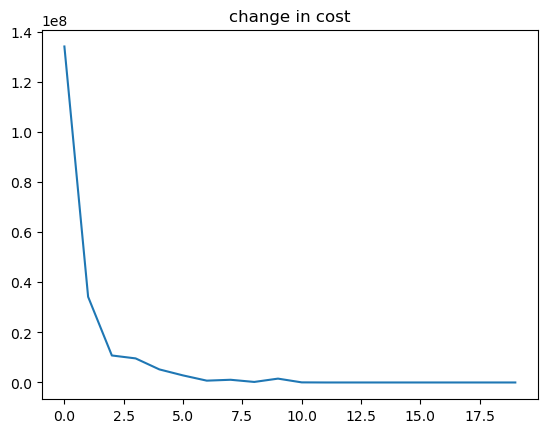

In [30]:
plt.plot(list(range(len(cost_hist))),cost_hist)
plt.title("change in cost")
plt.show()

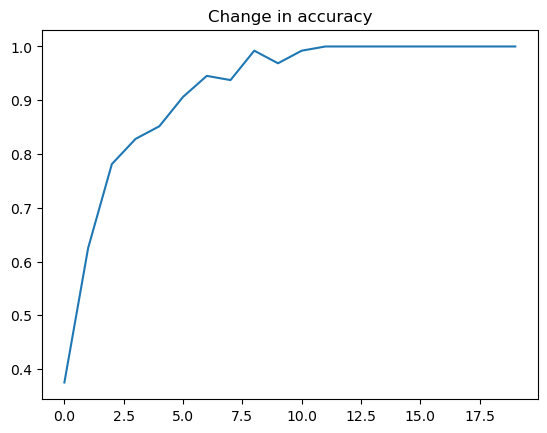

In [31]:
plt.plot(list(range(len(acc_hist))), acc_hist)
plt.title("Change in accuracy")
plt.show()

Training the Neural Network on the whole dataset to get the Optimized Weights and Biases

In [32]:
print('Training on the whole dataset....\n')
with tf.Session() as sess:
    sess.run(init) # Running Initializer
    cost_hist, acc_hist = [], []
    for epoch in range(1, epochs + 1):
        _x, _y = next_batch(batch_size, x, y_encoded)
        # Running Optimizer
        sess.run(train_op,
                 feed_dict = {
                     X : _x,
                     Y : _y,
                     keep_prob : dropout
                 })
        if epoch % display_step == 0:
            # Calculating Loss and Accuracy on the current Epoch
            loss, acc = sess.run([loss_op, accuracy],
                                 feed_dict = {
                                     X : _x,
                                     Y : _y,
                                     keep_prob : 1.0
                                 })
            loss = sum(loss)
            cost_hist.append(loss)
            acc_hist.append(acc)
            print('Epoch ' + str(epoch) + ', Cost: ' + str(loss) + ', Accuracy: ' + str(acc * 100) + ' %')
    print('-' * 50)
    print('\nOptimization Finished\n')
    print('Accuracy after training on whole dataset Data: ' + str(sess.run(accuracy,
                                                       feed_dict = {
                                                           X : x,
                                                           Y : y_encoded,
                                                           keep_prob : 1.0
                                                       }) * 100) + ' %')
    W = sess.run(weights)
    B = sess.run(biases)

Training on the whole dataset....

Epoch 100, Cost: 153097096.125, Accuracy: 44.53125 %
Epoch 200, Cost: 35848926.125, Accuracy: 73.4375 %
Epoch 300, Cost: 19607582.125, Accuracy: 77.34375 %
Epoch 400, Cost: 10020301.5625, Accuracy: 81.25 %
Epoch 500, Cost: 4738070.96875, Accuracy: 86.71875 %
Epoch 600, Cost: 2629285.4375, Accuracy: 89.84375 %
Epoch 700, Cost: 937309.796875, Accuracy: 92.96875 %
Epoch 800, Cost: 1111413.71875, Accuracy: 93.75 %
Epoch 900, Cost: 253199.84375, Accuracy: 95.3125 %
Epoch 1000, Cost: 462020.96875, Accuracy: 97.65625 %
Epoch 1100, Cost: 267809.875, Accuracy: 97.65625 %
Epoch 1200, Cost: 294061.90625, Accuracy: 98.4375 %
Epoch 1300, Cost: 9446.9375, Accuracy: 99.21875 %
Epoch 1400, Cost: 86518.375, Accuracy: 99.21875 %
Epoch 1500, Cost: 25540.375, Accuracy: 99.21875 %
Epoch 1600, Cost: 0.0, Accuracy: 100.0 %
Epoch 1700, Cost: 0.0, Accuracy: 100.0 %
Epoch 1800, Cost: 47019.375, Accuracy: 99.21875 %
Epoch 1900, Cost: 0.0, Accuracy: 100.0 %
Epoch 2000, Cost: 0.0

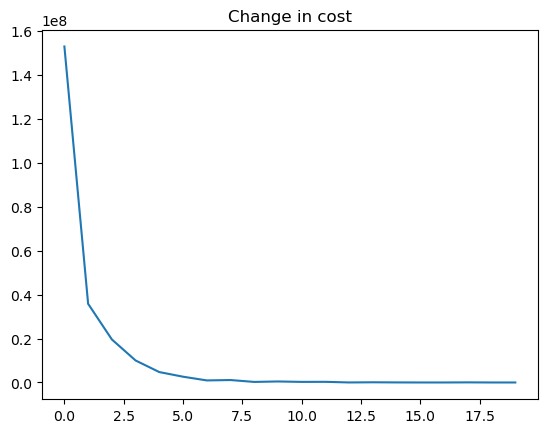

In [33]:
plt.plot(list(range(len(cost_hist))), cost_hist)
plt.title("Change in cost")
plt.show()


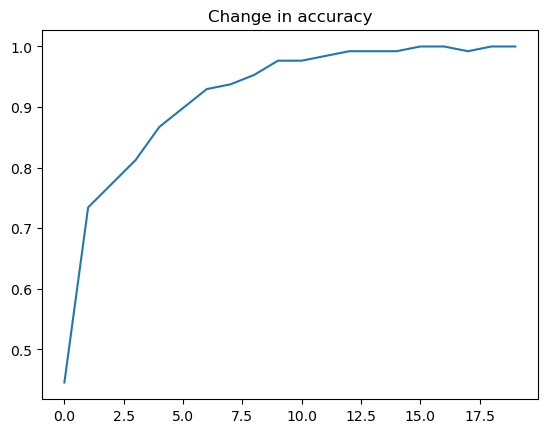

In [34]:
plt.plot(list(range(len(acc_hist))), acc_hist)
plt.title("Change in accuracy")
plt.show()

Predictiong the Model on Test Data 

In [35]:
data_test=pd.read_csv('sign_mnist_test.csv')
print('Dataframe shape:', data_test.shape)

Dataframe shape: (7172, 785)


In [36]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [37]:
x_test = data_test.iloc[:, 1:].values
y_test = data_test.iloc[:, :1].values.flatten()
y_test = one_hot_encode(y_test)
x_test.shape, y_test.shape

((7172, 784), (7172, 25))

In [38]:
X = tf.placeholder(tf.float32, shape = [None, n_input]) # Placeholder for Feature Matrix
Y = tf.placeholder(tf.float32, shape = [None, n_classes]) # Placeholder for Labels
keep_prob = tf.placeholder(tf.float32) # Placeholder for Dropout Rate

In [39]:
y_pred = neural_network(X, W, B, 1.0)

In [40]:
def get_prediction(img):
    with tf.Session() as sess:
        pred = sess.run(y_pred, feed_dict = { X : img, keep_prob : 1.0 })
    img = img.reshape(28, 28)
    pred = list(pred.flatten())
    pred = chr(pred.index(max(pred)) + 65)
    return (img, pred)

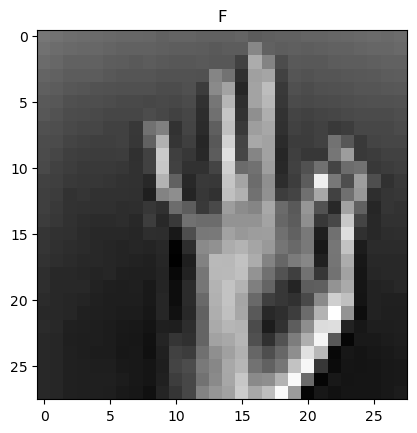

In [41]:
image, pred = get_prediction(x_test[1].reshape(1, 784))
plt.imshow(image, cmap = 'binary')
plt.title(pred)
plt.show()

Saving Parameters

In [42]:
for key in W.keys():
    np.save(key, W[key])

In [43]:
for key in B.keys():
    np.save(key, B[key])